In [252]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-dark')

In [253]:
matches=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\matches.csv',parse_dates=['date'])
deliveries=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\deliveries.csv')


matches.replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True)
deliveries.replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True)

matches.replace('Delhi Daredevils','Delhi Capitals',inplace=True)
deliveries.replace('Delhi Daredevils','Delhi Capitals',inplace=True)

deliveries.wide_runs.replace(0,np.nan,inplace=True)

In [254]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Q1

In [255]:
dc_srh=matches[((matches.team1=='Delhi Capitals') | (matches.team2=='Delhi Capitals')) & ((matches.team1=='Sunrisers Hyderabad') | (matches.team2=='Sunrisers Hyderabad'))].copy()
dc=matches[(matches.team1=='Delhi Capitals') | (matches.team2=='Delhi Capitals')].copy()
srh=matches[(matches.team1=='Sunrisers Hyderabad') | (matches.team2=='Sunrisers Hyderabad')].copy()
dc_srh.shape,dc.shape,srh.shape

((26, 18), (177, 18), (183, 18))

In [256]:
dc_srhdeli=deliveries[((deliveries.batting_team=='Delhi Capitals') | (deliveries.bowling_team=='Delhi Capitals')) & ((deliveries.batting_team=='Sunrisers Hyderabad') | (deliveries.bowling_team=='Sunrisers Hyderabad'))].copy()
dcdeli=deliveries[(deliveries.batting_team=='Delhi Capitals') | (deliveries.bowling_team=='Delhi Capitals')].copy()
srhdeli=deliveries[(deliveries.batting_team=='Sunrisers Hyderabad') | (deliveries.bowling_team=='Sunrisers Hyderabad')].copy()
dc_srhdeli.shape,dcdeli.shape,srhdeli.shape

((6140, 21), (41383, 21), (43760, 21))

In [257]:
dc_srh.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
20,21,2017,Hyderabad,2017-04-19,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,15,0,KS Williamson,"Rajiv Gandhi International Stadium, Uppal",CB Gaffaney,NJ Llong,NaN
38,39,2017,Delhi,2017-05-02,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,6,Mohammed Shami,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
65,66,2008,Hyderabad,2008-04-22,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Delhi Capitals,0,9,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",IL Howell,AM Saheba,NaN
97,98,2008,Delhi,2008-05-15,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Delhi Capitals,12,0,A Mishra,Feroz Shah Kotla,BG Jerling,GA Pratapkumar,NaN
135,136,2009,Centurion,2009-04-30,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,6,DP Nannes,SuperSport Park,GAV Baxter,AM Saheba,NaN


In [258]:
dc.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Capitals,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Capitals,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
14,15,2017,Delhi,2017-04-15,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,0,Delhi Capitals,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
17,18,2017,Delhi,2017-04-17,Delhi Capitals,Kolkata Knight Riders,Delhi Capitals,bat,normal,0,Kolkata Knight Riders,0,4,NM Coulter-Nile,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
20,21,2017,Hyderabad,2017-04-19,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,15,0,KS Williamson,"Rajiv Gandhi International Stadium, Uppal",CB Gaffaney,NJ Llong,NaN


In [259]:
srh.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
18,19,2017,Hyderabad,2017-04-17,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,5,0,B Kumar,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,A Deshmukh,NaN


In [260]:
def cat_plot(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(ncols=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],colors=['lightgreen','green'],autopct='%2.f%%')
        ax[i].set_title(columns[i])

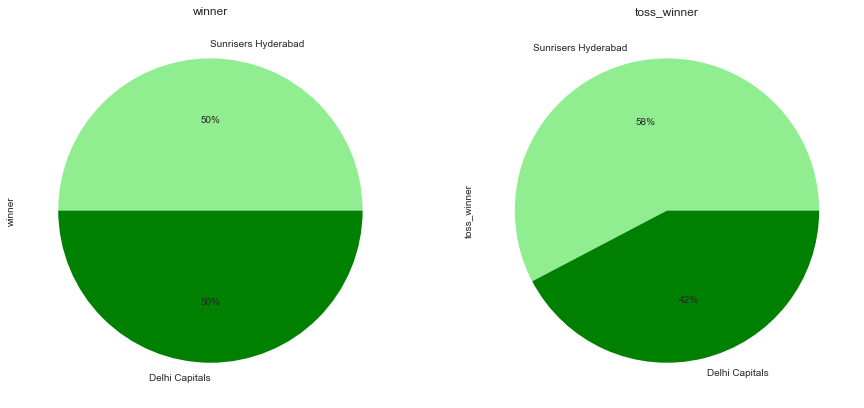

In [261]:
cat_plot(dc_srh,['winner','toss_winner'],(15,8),'pie')

### We can observe that there is 50-50 chances for both the teams to win the match but the toss winning percentage is higher for SRH

In [262]:
def cat_plot(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(nrows=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],color='teal')
        ax[i].set_title(columns[i])

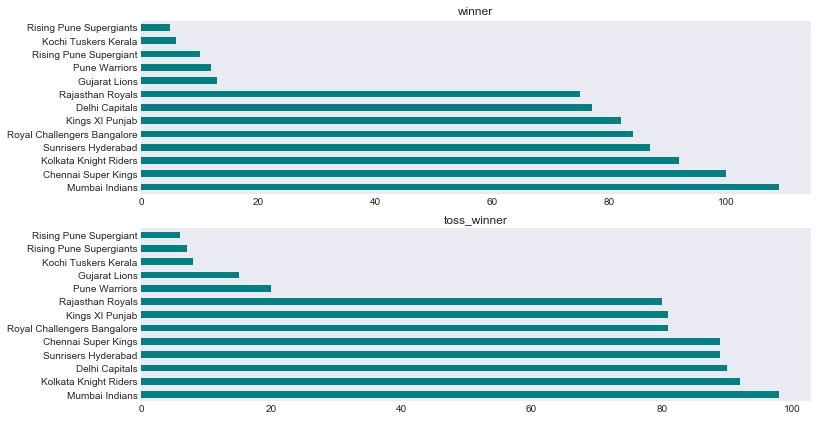

In [263]:
cat_plot(matches,['winner','toss_winner'],(12,7),'barh')

### Here we can see that there is higher overall winning chance for SRH whereas the toss wins are higher for DC
- As the data doesn't give any proper indication for who will win we will go with the team with higher overall wins

# Q2

In [264]:
score_df=dc_srhdeli[dc_srhdeli.batting_team.str.contains('Sunrisers Hyderabad')].groupby(['match_id',
                                                                                          'over',
                                                                                           'ball']).agg({'batsman_runs':'sum',
                                                                                                        'ball':'count'})
score_df

batsman_runs  ball
match_id over ball                    
21       1    1                1     1
              2                4     1
              3                1     1
              4                0     1
              5                1     1
...                          ...   ...
11413    20   5                0     1
              6                0     1
              7                1     1
              8                0     1
              9                1     1

[3027 rows x 2 columns]

In [265]:
score_df=dc_srhdeli[dc_srhdeli.batting_team.str.contains('Sunrisers Hyderabad')].groupby(['match_id',
                                                                                          'over',
                                                                                           'ball']).agg({'batsman_runs':'sum',
                                                                                                        'ball':'count'})
score_counter=0  
ball_counter=0
for i in score_df.itertuples():
    score_counter+=i[1]
    if score_counter==30:
        ball_counter+=i[2]
        score_counter=0
    if score_counter==20:
        print(score_counter)
        break 
        
ball_counter,score_counter

(1, 3837)

In [266]:
score_counter

3837

# Q3

In [267]:
warner=deliveries[deliveries.batsman.str.contains('DA Warner')].groupby(['match_id',
                                                                  'over',
                                                                  'ball']).agg({'batsman_runs':'sum',
                                                                                'ball':'count',
                                                                                'player_dismissed':'count'})
traverse=warner.itertuples()
#for _ in traverse:
#     print(_)

In [268]:
run_sum=0
for _ in warner.itertuples():
    if _[3]==1:
        _[1]

# Q4

In [269]:
highest_boundaries=dc_srhdeli.query('batsman_runs>=4').groupby(['match_id',
                                                                 'batsman']).ball.count()

highest_boundaries=highest_boundaries.groupby('batsman').mean().round()
highest_boundaries

batsman
A Ashish Reddy     2.0
A Hales            4.0
A Mishra           2.0
A Nehra            3.0
A Symonds          5.0
                  ... 
WPUJC Vaas         1.0
Y Nagar            2.0
Y Venugopal Rao    3.0
YK Pathan          2.0
Yuvraj Singh       5.0
Name: ball, Length: 96, dtype: float64

Text(0.5, 1.0, 'Frequency Distribution of top 20 Batsmen with highest boundaries')

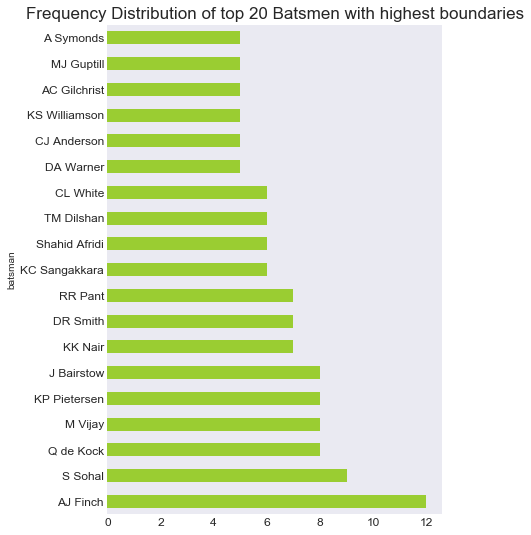

In [270]:
highest_boundaries.sort_values().iloc[-1:-20:-1].plot.barh(figsize=(6,9),
                                           color='yellowgreen',
                                           fontsize=12)

plt.title('Frequency Distribution of top 20 Batsmen with highest boundaries',fontsize=17)

### As we can observe from the above analysis the batsman with the highest boundaries in the match can be DA Warner or KS Williamson or others

# Q5

In [271]:
rashid_wickets=deliveries[deliveries.bowler.str.contains('Rashid Khan')].groupby(['match_id',
                                                                   ]).player_dismissed.count()
rashid_wickets.describe()

count    46.000000
mean      1.304348
std       0.939730
min       0.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: player_dismissed, dtype: float64

Text(0.5, 1.0, 'Rashid Khan Wicket Distribution')

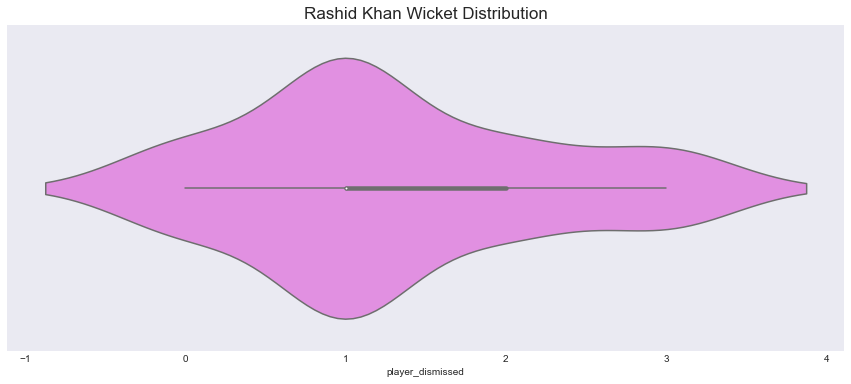

In [272]:
plt.figure(figsize=(15,6))
sns.violinplot(rashid_wickets,
              color='violet')

plt.title('Rashid Khan Wicket Distribution',fontsize=17)

### As we can observe from the above graph R Khan is likely to take 1 wicket in the match